# Star wars survey

¿Do the rest of America realizes that *The Empire Strikes Back* is the best of the series? 

In [1]:
# installing dependencies
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib

In [2]:
# importing dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [3]:
# read data
star_wars = pd.read_csv("data-master/star_wars.csv", encoding="ISO-8859-1")

## Data Dictionary
* RespondentID: An anonymized ID for the respondent (person taking the survey)
* Gender: The respondent's gender
* Age: The respondent's age
* Household Income: The respondent's income
* Education: The respondent's education level
* Location (Census Region): The respondent's location
* Have you seen any of the 6 films in the Star Wars franchise?: Has a Yes or No response
* Do you consider yourself to be a fan of the Star Wars film franchise?: Has a Yes or No response

In [4]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [5]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [6]:
star_wars.shape

(1187, 38)

In [7]:
star_wars = star_wars[ pd.notnull(star_wars["RespondentID"])  ] 

In [8]:
star_wars.shape

(1186, 38)

In [9]:
# Map boolean columns


seen_col = "Have you seen any of the 6 films in the Star Wars franchise?"
fan_col = "Do you consider yourself to be a fan of the Star Wars film franchise?"
bool_map = { "Yes": True, "No": False  }

print(star_wars[seen_col].value_counts(dropna=False))
print(star_wars[fan_col].value_counts(dropna=False))

star_wars[seen_col] = star_wars[seen_col].map(bool_map)
star_wars[fan_col] = star_wars[fan_col].map(bool_map) 

print(star_wars[seen_col].value_counts(dropna=False))
print(star_wars[fan_col].value_counts(dropna=False))

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64
True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


In [10]:
names_map = {
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4": "seen_2",
    "Unnamed: 5": "seen_3",
    "Unnamed: 6": "seen_4",
    "Unnamed: 7": "seen_5",
    "Unnamed: 8": "seen_6",
}

star_wars.rename(names_map,axis=1, inplace=True)
    
star_wars.columns[3:9]

bool_map = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.nan: False
    }


for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(bool_map)
    print(star_wars[col].value_counts(dropna=False))
    print('')
    print('')
    




True     673
False    513
Name: seen_1, dtype: int64


False    615
True     571
Name: seen_2, dtype: int64


False    636
True     550
Name: seen_3, dtype: int64


True     607
False    579
Name: seen_4, dtype: int64


True     758
False    428
Name: seen_5, dtype: int64


True     738
False    448
Name: seen_6, dtype: int64




In [28]:
names_map = {
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
    "Unnamed: 10": "ranking_2",
    "Unnamed: 11": "ranking_3",
    "Unnamed: 12": "ranking_4",
    "Unnamed: 13": "ranking_5",
    "Unnamed: 14": "ranking_6",    
}

star_wars.rename(names_map,axis=1, inplace=True)

star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

for col in star_wars.columns[9:15]:
    print(star_wars[col].value_counts(dropna=False))
    print('')
    print('')

NaN    351
4.0    237
6.0    168
3.0    130
1.0    129
5.0    100
2.0     71
Name: ranking_1, dtype: int64


NaN    350
5.0    300
4.0    183
2.0    116
3.0    103
6.0    102
1.0     32
Name: ranking_2, dtype: int64


NaN    351
6.0    217
5.0    203
4.0    182
3.0    150
2.0     47
1.0     36
Name: ranking_3, dtype: int64


NaN    350
1.0    204
6.0    161
2.0    135
4.0    130
3.0    127
5.0     79
Name: ranking_4, dtype: int64


NaN    350
1.0    289
2.0    235
5.0    118
3.0    106
4.0     47
6.0     41
Name: ranking_5, dtype: int64


NaN    350
2.0    232
3.0    220
1.0    146
6.0    145
4.0     57
5.0     36
Name: ranking_6, dtype: int64




# Movies ranking

<BarContainer object of 6 artists>

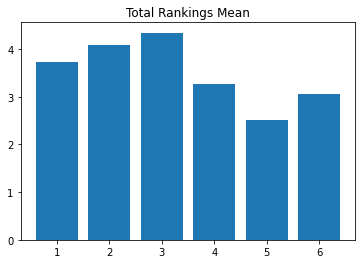

In [47]:
rankings_mean = star_wars[star_wars.columns[9:15]].mean()

fig, ax = plt.subplots()

ind = [1, 2, 3, 4, 5, 6]

ax.set_title("Total Rankings Mean")

ax.bar(ind, rankings_mean)


### Where 1 is best ranking and 6 is the worst

Clearly _The Empire Strikes Back_ is the best ranked, whil _The Revenge of the Sith_ is the worst ranked.




# Seen means

<BarContainer object of 6 artists>

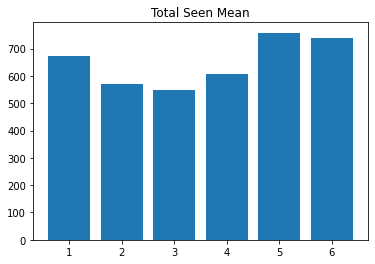

In [49]:
seen_sum = star_wars[star_wars.columns[3:9]].sum()

fig, ax = plt.subplots()

ind = [1, 2, 3, 4, 5, 6]

ax.set_title("Total Seen Mean")

ax.bar(ind, seen_sum)

Also _The Empire Strikes Back_ with _The Return of the Jedi_ are the most seen movies.

# Fans reviews

<BarContainer object of 6 artists>

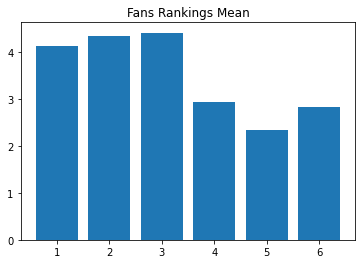

In [51]:
fan_col = "Do you consider yourself to be a fan of the Star Wars film franchise?"

fans = star_wars[star_wars[fan_col] == True]

fans_rankings_mean = fans[fans.columns[9:15]].mean()

fig, ax = plt.subplots()

ind = [1, 2, 3, 4, 5, 6]

ax.set_title("Fans Rankings Mean")

ax.bar(ind, fans_rankings_mean)


<BarContainer object of 6 artists>

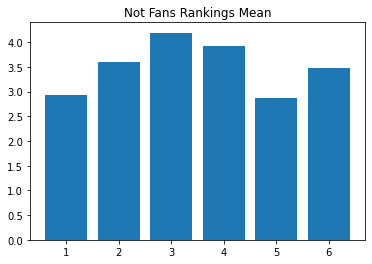

In [52]:
not_fans = star_wars[star_wars[fan_col] == False]

not_fans_rankings_mean = not_fans[not_fans.columns[9:15]].mean()

fig, ax = plt.subplots()

ind = [1, 2, 3, 4, 5, 6]

ax.set_title("Not Fans Rankings Mean")


ax.bar(ind, not_fans_rankings_mean)

# Star Trek Fans Means

<BarContainer object of 6 artists>

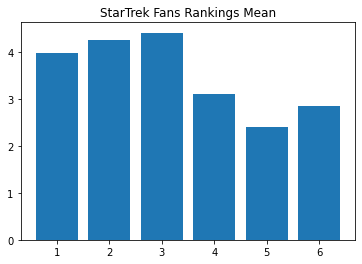

In [57]:
st_fan_col = "Do you consider yourself to be a fan of the Star Trek franchise?"

st_fans = star_wars[star_wars[st_fan_col] == "Yes"]

st_fans_rankings_mean = st_fans[st_fans.columns[9:15]].mean()

fig, ax = plt.subplots()

ind = [1, 2, 3, 4, 5, 6]

ax.set_title("StarTrek Fans Rankings Mean")

ax.bar(ind, st_fans_rankings_mean)

<BarContainer object of 6 artists>

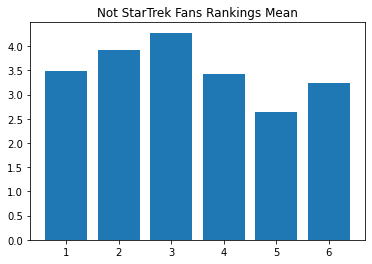

In [58]:
not_st_fan_col = "Do you consider yourself to be a fan of the Star Trek franchise?"

not_st_fans = star_wars[star_wars[not_st_fan_col] == "No"]

not_st_fans_rankings_mean = not_st_fans[not_st_fans.columns[9:15]].mean()

fig, ax = plt.subplots()

ind = [1, 2, 3, 4, 5, 6]

ax.set_title("Not StarTrek Fans Rankings Mean")

ax.bar(ind, not_st_fans_rankings_mean)

# Gender Rankings

<BarContainer object of 6 artists>

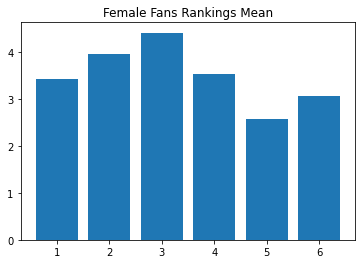

In [63]:
gender_col = "Gender"

female_fans = star_wars[star_wars[gender_col] == "Female"]

female_fans_rankings_mean = female_fans[female_fans.columns[9:15]].mean()

fig, ax = plt.subplots()

ind = [1, 2, 3, 4, 5, 6]

ax.set_title("Female Fans Rankings Mean")

ax.bar(ind, female_fans_rankings_mean)

<BarContainer object of 6 artists>

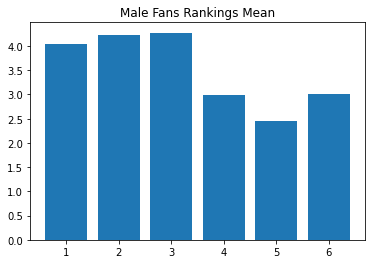

In [64]:
gender_col = "Gender"

male_fans = star_wars[star_wars[gender_col] == "Male"]

male_fans_rankings_mean = male_fans[male_fans.columns[9:15]].mean()

fig, ax = plt.subplots()

ind = [1, 2, 3, 4, 5, 6]

ax.set_title("Male Fans Rankings Mean")

ax.bar(ind, male_fans_rankings_mean)